# Interpolación de Lagrange


Supongamos que contamos con un conjunto de datos discretos conformados por los puntos siguientes:


\begin{equation*}
	\left\lbrace \left(x_0, y_0\right), \left(x_1, y_1\right), \left(x_2, y_2\right), \dots, \left(x_n, y_n\right) \right\rbrace.
\end{equation*}


Notemos que estamos definiendo ciertos polinomios interpoladores de tal forma que dependen de $L^{(k)}_i$, los cuales llamamos como **polinomios de Lagrange**, es decir:


\begin{equation}
	L^{(n)}_j\left(x\right)  = \prod_{\substack{i=0\\ i\neq j}}^n \frac{x - x_i}{x_j - x_i} = \frac{\left(x - x_0\right)\left(x - x_1\right)\cdots\left(x - x_{j-1}\right)\left(x - x_{j+1}\right)\cdots\left(x - x_{n-1}\right)\left(x - x_n\right)}{\left(x_j - x_0\right)\left(x_j - x_1\right)\cdots\left(x_j - x_{j-1}\right)\left(x_j - x_{j+1}\right)\cdots\left(x_j - x_{n-1}\right)\left(x_j - x_n\right)}
\end{equation}


Cabe señalar, que siempre y cuando este claro el orden del polinomio de Lagrange, podremos omitir el superíndice $n$ y sólo denotar los polinomios por:


\begin{equation*}
	L_j \left(x\right) = \prod_{\substack{i=0\\ i\neq j}}^n \frac{x - x_i}{x_j - x_i}
\end{equation*}


Ahora bien, denotaremos el polinomio interpolador de orden $n$ como sigue:


\begin{equation*}
	f\left(x\right) = y_0 L_0\left(x\right) + y_1 L_1\left(x\right) + \cdots + y_n L_n\left(x\right) = \sum_{i = 0}^n y_i L_i\left(x\right)
\end{equation*}

In [10]:
# Procederemos a determinar este tipo de interpolación en Scipy
import sympy as sp

# También importaremos numpy para tener el cálculo numérico
import numpy as np

# También importamos la libreria de graficación
import matplotlib.pyplot as plt

# Importamos la libreria de pandas
import pandas as pd

In [11]:
# Definimos un simbolo con el cual vamos a trabajar
x = sp.Symbol('x')

In [12]:
# Importamos la información mediante un archivo en csv
data = pd.read_csv('LagrangeDatos.csv')

# Visualizamos la información mediante un arreglo
arreglo = data.values

In [13]:
# Determinamos cuantos datos tenemos
n = len(arreglo)

# Definiremos una lista donde guardaremos las funciones
lagrange = []

# Determinamos las funciones de lagrange
for i in range(n):
    
    exp = 1
    
    # Calculamos los polinomios de lagrange
    for j in range(n):
        
        # Evitamos cuando i = j
        if i != j:
            
            # Termino del producto
            lagran = (x - arreglo[j,0]) / (arreglo[i,0] - arreglo[j,0])
            
            exp = exp * lagran
    
    # Agregamos la función
    lagrange.append(sp.expand(exp))
    
# Ahora determinamos el polinomio interpolador

# Definimos el interpolador
interpolador = 0

# Calculamos el polinomio
for i in range(n):
    
    # Sumamos
    interpolador = interpolador + arreglo[i,1] * lagrange[i]
    
interpolador

-1.20925833333274*x**5 + 2.15797083333473*x**4 - 1.15943791666177*x**3 + 1.2181097916623*x**2 + 0.503435554999669*x - 0.85272796000018

In [19]:
# Evaluamos la expresión
abs(interpolador.subs(x,0.85000000) - np.sin(np.exp(0.85000000) -2))

2.55193128440023e-6

In [15]:
# Convertimos la expresión a numpy
fxn = sp.lambdify(x,interpolador,'numpy')

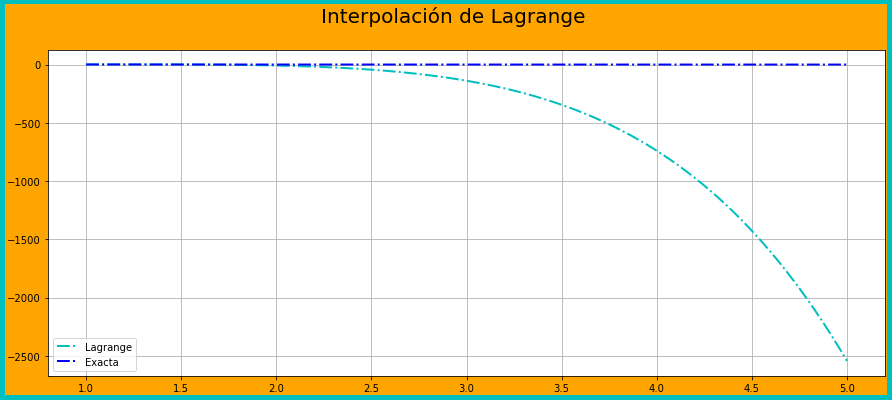

In [16]:
# Creamos la gráfica de forma que podamos modificarla
fig = plt.figure(figsize = [15,6], facecolor = 'orange', edgecolor = 'c', linewidth = 10)
# Titulo de la grafica
fig.suptitle('Interpolación de Lagrange', fontsize = 20)
# Creamos los ejes
ax = plt.axes()
# Creamos una secuencia de puntos desde el 1 al 5
x1 = np.linspace(1, 5, 100)
# Evaluamos la función en el polinomio interpolador
y = fxn(x1)
# Creamos los subplots para el primero
g1 = ax.plot(x1, y)
# Asignamos las propiedades de la primer gráfica
g1[0].set_color('c')
g1[0].set_linestyle('-.')
g1[0].set_linewidth(2)
g1[0].set_drawstyle('default')
g1[0].set_label('Lagrange')

# Creamos los subplots para el segundo
g2 = ax.plot(x1, 1 / x1)

# Asignamos las propiedades de la primer gráfica
g2[0].set_color('blue')
g2[0].set_linestyle('-.')
g2[0].set_linewidth(2)
g2[0].set_drawstyle('default')
g2[0].set_label('Exacta')

# Mostramos las leyendas
plt.legend()

# Mostramos la malla
plt.grid(True)

# Mostramos la gráfica
plt.show()